# Name     Fizza Tehreem

# Ag#   2022-ag-8639

In [2]:
#import pandas library and load dataset
import pandas as pd
df=pd.read_csv('cancerpatient.csv')
df


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
#Drop first two unnecessary columns
df=df.drop(['index','Patient Id'],axis=1)

In [6]:
# Check info to check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [8]:
#Check the shape
df.shape

(1000, 24)

In [10]:
#To make sure dataset has no null value
df.isna().sum().sum()

0

In [12]:
#check our target column and its datatype
df['Level']

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [14]:
#Check the possible categories in column
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [16]:
#convert categorical value to integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Level"]=le.fit_transform(df["Level"])
df['Level']

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int32

In [18]:
#Check all columns to make sure all columns have integer value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

## Data Conversion

In [20]:
#import numpy library and assign features and classes
import numpy as np
X=df.values
Y=df['Level'].values

In [22]:
print(X)

[[33  1  2 ...  3  4  1]
 [17  1  3 ...  7  2  2]
 [35  1  4 ...  7  2  0]
 ...
 [25  2  4 ...  7  2  0]
 [18  2  6 ...  2  3  0]
 [47  1  6 ...  7  2  0]]


In [24]:
# Seperate target class from features
X=np.delete(X,23,axis=1)
X

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]], dtype=int64)

# Gaussian Naive Base

## Split train_test

In [26]:
#Mine ag number is 2022-ag-8639
# 8+6+3+9/100=0.26
# test_size=0.26   and    random_state=26
#seperate train and test data


from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y,test_size=0.26,random_state=26)

In [28]:
#Print the length og trainig and testing data

print("The length of X_Train",len(X_Train))
print("The length of X_Test",len(X_Test))
print("The length of Y_Train",len(Y_Train))
print("The length of Y_Test",len(Y_Test))


The length of X_Train 740
The length of X_Test 260
The length of Y_Train 740
The length of Y_Test 260


## Training

In [30]:
#Apply the Gaussian Naive Base model


from sklearn.naive_bayes import GaussianNB
fizza=GaussianNB()
fizza.fit(X_Train,Y_Train)
GaussianNB()



GaussianNB()

## Testing

In [32]:
#predict the values

y_pred=fizza.predict(X_Test)
y_pred

array([0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2,
       2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1])

In [67]:
print(Y_Test)

[2 0 2 0 2 2 0 0 0 0 0 0 2 1 0 0 2 1 2 1 2 1 0 0 2 0 1 0 2 1 1 0 0 2 2 0 1
 0 1 2 2 0 2 2 1 2 1 2 2 2 0 0 2 0 0 1 1 1 2 0 1 2 1 2 0 2 1 1 1 1 2 1 2 1
 1 2 0 2 1 2 2 0 2 2 2 0 2 1 2 2 1 0 2 1 2 0 2 0 0 0 1 1 2 2 0 2 1 2 0 1 0
 1 1 0 0 0 2 2 0 1 2 1 2 1 1 0 2 2 0 1 2 1 0 0 2 0 1 1 0 1 0 0 1 1 1 2 0 2
 0 2 2 1 2 1 1 1 1 1 2 2 2 2 1 2 1 2 0 2 1 1 1 2 2 2 1 0 2 2 2 2 2 2 0 0 2
 0 0 0 0 2 0 2 0 2 0 2 1 0 0 1 0 1 2 1 2 2 1 0 2 2 1 1 0 1 2 2 1 2 2 0 1 2
 0 0 0 0 1 0 0 1 0 2 1 1 2 1 2 2 2 0 2 0 2 0 2 1 1 0 0 1 1 0 1 2 0 1 0 2 0
 0]


## Accuracy

In [71]:
#Check the accuracy

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Test,y_pred)
print("The accuracy of the model is" , accuracy)

The accuracy of the model is 0.9153846153846154


In [77]:
#Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_Test,y_pred)

array([[78,  4,  2],
       [ 0, 68, 10],
       [ 0,  6, 92]], dtype=int64)

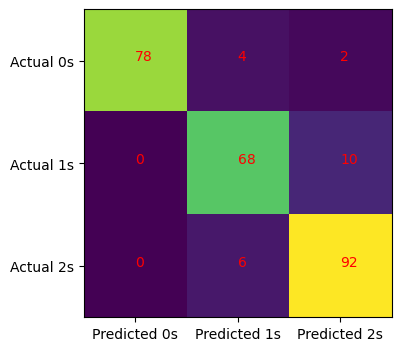

In [131]:
#Import matplotlib library for graphical visualization of confusion matrix

import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Test,y_pred)
fig,ax=plt.subplots(figsize=(4,4))

#For making image

ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 1s','Actual 2s'))

#determine the y axis limit
ax.set_ylim(2.5,-0.5)

#loop for printing numbers in rows
for i in range(3):
    for j in range(3):
        ax.text(j,i,cm[i,j],  color='red')
plt.show()  

In [133]:
#For printing the classification report

report=classification_report(Y_Test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        84
           1       0.87      0.87      0.87        78
           2       0.88      0.94      0.91        98

    accuracy                           0.92       260
   macro avg       0.92      0.91      0.92       260
weighted avg       0.92      0.92      0.92       260



# Logistic Regression

## Split data in test and train

In [34]:
#split data in test and train

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.26 ,random_state=26)

## Training

In [38]:
#Apply Logistic Regression

from sklearn.linear_model import LogisticRegression
fizza=LogisticRegression(solver='liblinear',random_state=26)

In [40]:
#Fit model of Logistic Regression

fizza.fit(X_Train,Y_Train)

LogisticRegression(random_state=26, solver='liblinear')

## Testing

In [42]:
#Predict the Y values
y_pred=fizza.predict(X_Test)
print(y_pred)

[0 1 0 1 0 0 1 1 1 1 1 1 0 2 1 1 0 2 0 2 0 2 1 1 0 1 2 1 0 2 2 1 1 0 0 1 2
 1 2 0 0 1 0 0 2 0 2 0 0 0 1 1 0 1 1 2 2 2 0 1 2 0 2 0 1 0 2 2 2 2 0 2 0 2
 2 0 1 0 2 0 0 1 0 0 0 1 0 2 0 0 2 1 0 2 0 1 0 1 1 1 2 2 0 0 1 0 2 0 1 2 1
 2 2 1 1 1 0 0 1 2 0 2 0 2 2 1 0 0 1 2 0 2 1 1 0 1 2 2 1 2 1 1 2 2 2 0 1 0
 1 0 0 2 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 0 2 2 2 0 0 0 2 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 2 1 1 2 1 2 0 2 0 0 2 1 0 0 2 2 1 2 0 0 2 0 0 1 2 0
 1 1 1 1 2 1 1 2 1 0 1 2 0 2 0 0 0 1 0 1 0 1 0 2 2 1 1 2 2 1 2 0 1 2 1 0 1
 1]


In [44]:
#Original Y

print(Y_Test)

[0 1 0 1 0 0 1 1 1 1 1 1 0 2 1 1 0 2 0 2 0 2 1 1 0 1 2 1 0 2 2 1 1 0 0 1 2
 1 2 0 0 1 0 0 2 0 2 0 0 0 1 1 0 1 1 2 2 2 0 1 2 0 2 0 1 0 2 2 2 2 0 2 0 2
 2 0 1 0 2 0 0 1 0 0 0 1 0 2 0 0 2 1 0 2 0 1 0 1 1 1 2 2 0 0 1 0 2 0 1 2 1
 2 2 1 1 1 0 0 1 2 0 2 0 2 2 1 0 0 1 2 0 2 1 1 0 1 2 2 1 2 1 1 2 2 2 0 1 0
 1 0 0 2 0 2 2 2 2 2 0 0 0 0 2 0 2 0 1 0 2 2 2 0 0 0 2 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 2 1 1 2 1 2 0 2 0 0 2 1 0 0 2 2 1 2 0 0 2 0 0 1 2 0
 1 1 1 1 2 1 1 2 1 0 2 2 0 2 0 0 0 1 0 1 0 1 0 2 2 1 1 2 2 1 2 0 1 2 1 0 1
 1]


## Y_model=w0 + w1x

In [52]:
#intercept of features
fizza.intercept_

array([-1.37112843,  4.76402308, -5.45527886])

In [54]:
#Coefficient of features
fizza.coef_

array([[-0.29958419, -1.59715575,  0.88756716,  2.39412551, -1.55884457,
        -1.1073286 , -0.03156715, -0.23701731,  0.29834074,  0.9380621 ,
        -0.13204058,  1.46269478, -0.36107427,  0.47539326,  1.38407836,
         0.18100063,  0.38138687, -0.7848389 ,  0.24122252, -0.88052545,
        -0.67915196,  0.49145018, -0.78136467],
       [ 0.09647109,  3.04011111,  0.34496491, -0.94173373, -0.02234573,
         1.43018581, -2.24218769,  0.14821588,  0.11350722, -0.93227848,
         0.72161784, -0.54234868,  0.79614237, -0.02271887, -2.50562054,
         1.35905682, -0.27297168,  0.10554404, -1.03429824, -1.1931404 ,
         0.07591803,  0.06506729,  0.38258723],
       [ 0.04519345, -1.1604161 , -1.15356863, -0.47155185,  2.03341524,
        -1.53617248,  1.20926237,  0.77177602, -0.16622112,  0.52325619,
        -0.24779209, -0.52487157, -0.3777185 , -0.24686393, -0.3268808 ,
        -0.10768465,  0.0632414 ,  0.28260943,  0.11448556,  0.30697745,
         0.09834257, -0.3947

## Accuracy

In [46]:
#Check the accuracy

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_Test,y_pred)
print("The accuracy of the model is" , accuracy)

The accuracy of the model is 0.9923076923076923


In [48]:
#to see confusion matrix

from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_Test,y_pred)

array([[98,  0,  0],
       [ 1, 83,  0],
       [ 0,  1, 77]], dtype=int64)

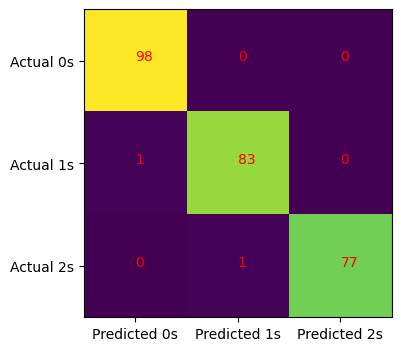

In [50]:
#Import matplotlib library for visualize the matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_Test,y_pred)

#show a figure
fig,ax=plt.subplots(figsize=(4,4))


#to show in image
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 1s','Predicted 2s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 1s','Actual 2s'))
ax.set_ylim(2.5,-0.5)

#Loop for printing values in rows
for i in range(3):
    for j in range(3):
        ax.text(j,i,cm[i,j],  color='red')
plt.show() 

In [56]:
#print classification report

report=classification_report(Y_Test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       0.99      0.99      0.99        84
           2       1.00      0.99      0.99        78

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



## Logistic regression gives good results on cancer dataset.
